The subsystem from models/IPTG_membrane.xml has multiple compartments
The Ids are identical, renaming stopped.


C:\Users\apand\Anaconda3\lib\site-packages\bioscrape\sbmlutil.py:90: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\apand\Anaconda3\lib\site-packages\bioscrape\sbmlutil.py:209: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +
C:\Users\apand\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
odeint failed with mxstep=500...C:\Users\apand\Anaconda3\lib\site-packages\b

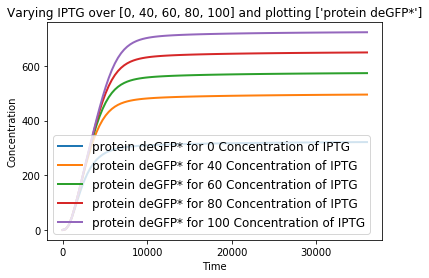

In [1]:
from subsbml import *
import time
alHL = createSubsystem('models/alHL.xml')
GFP = createSubsystem('models/GFP.xml')
membrane = createSubsystem('models/IPTG_membrane.xml')

external = createSubsystem('models/IPTG_reservoir.xml')

cell = System('cell')

cell.setInternal([alHL, GFP])
cell.setExternal(external)

cell.setMembrane(membrane)
cell_sub = cell.getModel()

cell_sub.setSpeciesAmount('IPTG',500, 'cell_external')
# cell_sub.setSpeciesAmount('RNAP',50000000)
# cell_sub.setSpeciesAmount('Ribo',50000000)
cell_sub.writeSBML('models/cell_transport_model.xml')

# Simulations 
gfp = cell_sub.getSpeciesByName('protein deGFP*')
timepoints = np.linspace(0,10*60*60,100)


### If bioscrape is installed, uncomment the following to simulate the model. Otherwise, use your own preferred simulator with the SBML model generated above. 
_ = cell_sub.simulateVariableInputs('IPTG',[0, 40, 60, 80, 100], ['protein deGFP*'], timepoints, Simulator = 'roadrunner', mode = 'reset', compartmentInput= 'cell_external',compartmentSpecies = 'cell_internal')




odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...

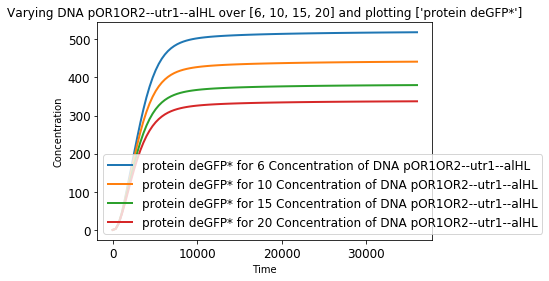

In [3]:
_ = cell_sub.simulateVariableInputs('DNA pOR1OR2--utr1--alHL',[6, 10, 15, 20], 
                                ['protein deGFP*'], timepoints, plotShow = 'single')


In [4]:

# More simulation options and optimizations in simulations

DNA_alHl = np.linspace(0,20,20)
DNA_gfp = np.linspace(0,20,20)
count = 0 
max_data = []
for i in range(len(DNA_gfp)):
    gfp = DNA_gfp[i]
    for j in range(len(DNA_alHl)):
        alhl = DNA_alHl[j]
        count += 1
        data, time, plt = cell_sub.simulateVariableInputs(['DNA plac--utr1--deGFP', 'DNA pOR1OR2--utr1--alHL'], 
            [[gfp,alhl]], ['protein deGFP*'], timepoints, plotShow = False)
        max_data.append(max(data))

max_index = max_data.index(max(max_data)) 
n = len(DNA_alHl)
x = (max_index // n)
y = max_index % n  
# print(DNA_alHl, DNA_gfp)
print('The max output protien concentration is', max(max_data))
print('The optimal concentration of DNA_alhl and DNA_gfp are{0},{1}'.format(DNA_alHl[y],DNA_gfp[x] ))


odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint f

odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint failed with mxstep=500...odeint f

[ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ] [ 0.          1.05263158  2.10526316  3.15789474  4.21052632  5.26315789
  6.31578947  7.36842105  8.42105263  9.47368421 10.52631579 11.57894737
 12.63157895 13.68421053 14.73684211 15.78947368 16.84210526 17.89473684
 18.94736842 20.        ]
719.8710849475418
1.0526315789473684,20.0


In [5]:

# # Use Road Runner
# import roadrunner
# rr = roadrunner.RoadRunner('models/cell_transport_model.xml')
# # result = rr.simulate(0,10*60*60,100)
# result = rr.simulate(0,24*60*60,1000, selections= ['time', gfp.getId()])
